In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Import the necessary libraries and modules:

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input, Concatenate, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

ModuleNotFoundError: No module named 'pandas'

Load the dataset from a CSV file:

In [ ]:
dataset = pd.read_csv('./lecture_data_new.csv')

Preprocess the dataset

In [ ]:
questions = dataset['Question'].values
answers = dataset['Answer'].values
marks = dataset['Marks'].values

Convert the questions and answers to numerical sequences

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(questions)
questions_seq = tokenizer.texts_to_sequences(questions)
answers_seq = tokenizer.texts_to_sequences(answers)

Pad the sequences to have a fixed length

In [ ]:
max_seq_length = max(max(len(q), len(a)) for q, a in zip(questions_seq, answers_seq))
questions_seq = tf.keras.preprocessing.sequence.pad_sequences(questions_seq, maxlen=max_seq_length)
answers_seq = tf.keras.preprocessing.sequence.pad_sequences(answers_seq, maxlen=max_seq_length)

Convert marks to a binary classification problem (pass/fail)

In [ ]:
marks_binary = (marks >= 5).astype(int)

Split the dataset into training and testing sets:

In [ ]:
# split_ratio = 0.8
# split_index = int(len(questions) * split_ratio)

# train_questions = questions_seq[:split_index]
# train_answers = answers_seq[:split_index]
# train_marks = marks_binary[:split_index]

# test_questions = questions_seq[split_index:]
# test_answers = answers_seq[split_index:]
# test_marks = marks_binary[split_index:]
train_questions, test_questions, train_answers, test_answers, train_marks, test_marks = train_test_split(
    questions_seq, answers_seq, marks_binary, test_size=0.2, random_state=42)

Build the RNN model using the functional API

In [ ]:
# input_questions = Input(shape=(max_seq_length,))
# input_answers = Input(shape=(max_seq_length,))

# embedding_layer = Embedding(len(tokenizer.word_index) + 1, 32)
# embedded_questions = embedding_layer(input_questions)
# embedded_answers = embedding_layer(input_answers)

# lstm_layer = LSTM(64)
# lstm_questions = lstm_layer(embedded_questions)
# lstm_answers = lstm_layer(embedded_answers)

# concatenated = Concatenate()([lstm_questions, lstm_answers])
# dropout = Dropout(0.2)(concatenated)
# output_layer = Dense(1, activation='sigmoid')(dropout)

# model = Model(inputs=[input_questions, input_answers], outputs=output_layer)


input_questions = Input(shape=(max_seq_length,))
input_answers = Input(shape=(max_seq_length,))

embedding_layer = Embedding(len(tokenizer.word_index) + 1, 32)
embedded_questions = embedding_layer(input_questions)
embedded_answers = embedding_layer(input_answers)

lstm_questions = LSTM(64)(embedded_questions)
lstm_answers = LSTM(64)(embedded_answers)

concatenated = Concatenate()([lstm_questions, lstm_answers])
dropout = Dropout(0.2)(concatenated)
output_layer = Dense(1, activation='sigmoid')(dropout)

model = Model(inputs=[input_questions, input_answers], outputs=output_layer)


2023-05-26 01:10:11.188675: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-26 01:10:11.190451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-26 01:10:11.192265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Compile the model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Train the model

In [ ]:
# history = model.fit([train_questions, train_answers], train_marks, epochs=10, batch_size=32, validation_data=([test_questions, test_answers], test_marks))
history = model.fit([train_questions, train_answers], train_marks, epochs=10, batch_size=32)

Epoch 1/10


2023-05-26 01:10:18.450994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-26 01:10:18.453252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-26 01:10:18.455261: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/4 [======>.......................] - ETA: 14s - loss: 0.6929 - accuracy: 0.5000

2023-05-26 01:10:23.338265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-26 01:10:23.340171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-26 01:10:23.342192: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4/4 [==============================] - 6s 411ms/step - loss: 0.6920 - accuracy: 0.5702 - val_loss: 0.6899 - val_accuracy: 0.5862
Epoch 2/10
4/4 [==============================] - 0s 74ms/step - loss: 0.6901 - accuracy: 0.5614 - val_loss: 0.6867 - val_accuracy: 0.5862
Epoch 3/10
4/4 [==============================] - 0s 72ms/step - loss: 0.6857 - accuracy: 0.5614 - val_loss: 0.6843 - val_accuracy: 0.5862
Epoch 4/10
4/4 [==============================] - 0s 86ms/step - loss: 0.6837 - accuracy: 0.5614 - val_loss: 0.6811 - val_accuracy: 0.5862
Epoch 5/10
4/4 [==============================] - 0s 90ms/step - loss: 0.6818 - accuracy: 0.5614 - val_loss: 0.6786 - val_accuracy: 0.5862
Epoch 6/10
4/4 [==============================] - 0s 70ms/step - loss: 0.6810 - accuracy: 0.5614 - val_loss: 0.6771 - val_accuracy: 0.5862
Epoch 7/10
4/4 [==============================] - 0s 62ms/step - loss: 0.6770 - accuracy: 0.5614 - val_loss: 0.6756 - val_accuracy: 0.5862
Epoch 8/10
4/4 [=====================

Plot the training and validation loss

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Plot the training and validation accuracy

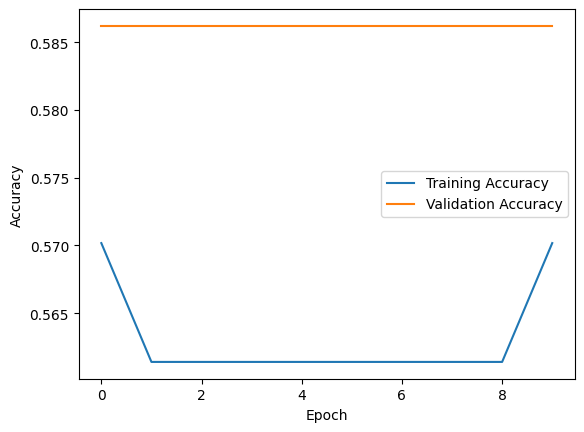

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('trained_model.h5')
print("Model saved successfully.")

Model saved successfully.


Evaluate the model on the test set:

In [ ]:
# loss, accuracy = model.evaluate([test_questions, test_answers], test_marks)
predictions = model.predict([test_questions, test_answers])
binary_predictions = (predictions >= 0.5).astype(int)
accuracy = accuracy_score(test_marks, binary_predictions)
# print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

1/1 [==============================] - 0s 219ms/step - loss: 0.6674 - accuracy: 0.5862
Test loss: 0.6674
Test accuracy: 0.5862


Grade new student answers

In [ ]:
new_student_question = "What is Computer?"
new_student_answer = "SLIIT."

Convert the new student question and answer to numerical sequences

In [ ]:
new_student_question_seq = tokenizer.texts_to_sequences([new_student_question])
new_student_answer_seq = tokenizer.texts_to_sequences([new_student_answer])

Load the saved model from the local directory

In [ ]:
local_model = load_model('./trained_model.h5')

2023-05-26 01:11:52.876960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-26 01:11:52.880349: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-26 01:11:52.882310: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Pad the sequences to have a fixed length

In [ ]:
max_seq_length = local_model.input_shape[0][1]
new_student_question_seq = tf.keras.preprocessing.sequence.pad_sequences(new_student_question_seq, maxlen=max_seq_length)
new_student_answer_seq = tf.keras.preprocessing.sequence.pad_sequences(new_student_answer_seq, maxlen=max_seq_length)

Predict the mark for the new student answer

In [ ]:
predicted_mark = local_model.predict([new_student_question_seq, new_student_answer_seq])
predicted_mark = predicted_mark.squeeze() * 10.0

print(f'Predicted mark for the new student answer: {predicted_mark:.1f}/10')

1/1 [==============================] - 0s 20ms/step
Predicted mark for the new student answer: 5.0/10
